In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

ARQ = '../data/raw/tempo.csv'

df = pd.read_csv(ARQ,
                sep = ';',
                decimal = ',',
                encoding = 'latin1'
)

df.head()

,ï»¿Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [2]:
df.shape

(14, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aparencia    14 non-null     object 
 1   temperatura  14 non-null     float64
 2   umidade      13 non-null     float64
 3   vento        13 non-null     object 
 4   jogar        14 non-null     object 
dtypes: float64(2), object(3)
memory usage: 692.0+ bytes


In [5]:
df.columns = ['aparencia', 'temperatura', 'umidade', 'vento', 'jogar']
df.head()

,aparencia,temperatura,umidade,vento,jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
agrupado = df.groupby('aparencia').size()
agrupado
# Aparencia deve ser sol, nublado ou chuva

aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [9]:
# Substituimos "menos" pela moda, ou sol, ou chuva já que é bimodal
df.loc[df['aparencia'] == 'menos', 'aparencia'] = 'sol'
agrupado = df.groupby('aparencia').size()
agrupado

aparencia
chuva      5
nublado    3
sol        6
dtype: int64

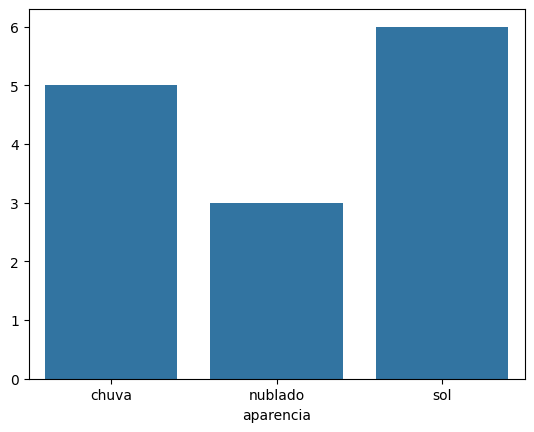

In [10]:
sns.barplot(x=agrupado.index, y=agrupado.values)
plt.show()

In [13]:
df['temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: temperatura, dtype: float64

In [12]:
df.loc[(df['temperatura'] < -130) | (df['temperatura'] > 130)]

,aparencia,temperatura,umidade,vento,jogar
7,sol,1220,95.0,FALSO,nao


In [26]:
# Substituir temperaturas inválidas pela mediana
mediana = sts.median(df['temperatura'])
mediana
mediana = int(mediana)
mediana

72

In [20]:
df.loc[(df['temperatura'] < -130) | (df['temperatura'] > 130), 'temperatura'] = mediana    

In [21]:
df.loc[(df['temperatura'] < -130) | (df['temperatura'] > 130)]

,aparencia,temperatura,umidade,vento,jogar


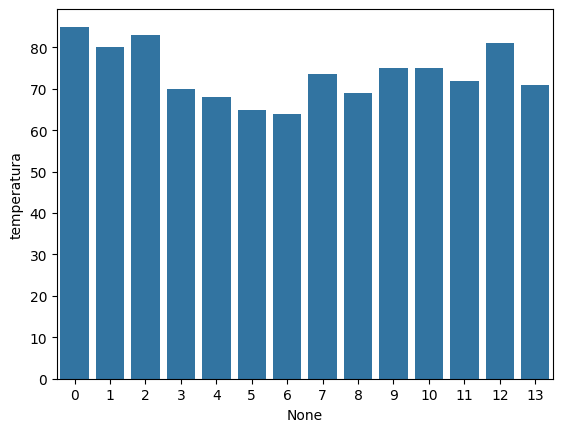

In [39]:
sns.barplot(data=df, x=df.index, y='temperatura')
plt.show()

In [22]:
df['umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: umidade, dtype: float64

In [23]:
df.loc[(df['umidade'] < 0) | (df['umidade'] > 100)]

,aparencia,temperatura,umidade,vento,jogar
9,chuva,75.0,200.0,NaN,sim


In [30]:
# Substituir umidade inválida pela mediana
mediana = sts.median(df['umidade'])
print(mediana, type(mediana))

85.5 <class 'float'>


In [31]:
df.loc[(df['umidade'] < 0) | (df['umidade'] > 100), 'umidade'] = mediana

In [32]:
df.loc[(df['umidade'] < 0) | (df['umidade'] > 100)]

,aparencia,temperatura,umidade,vento,jogar


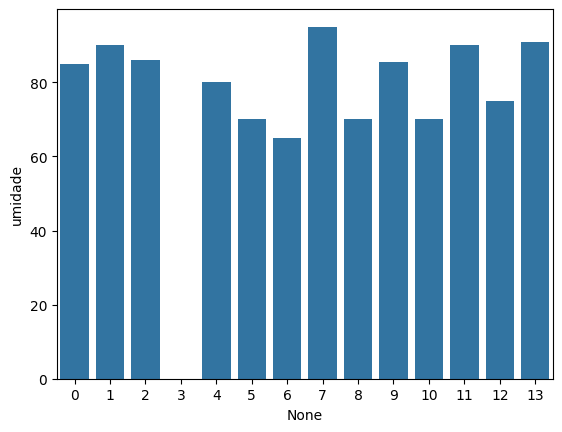

In [40]:
sns.barplot(data=df, x=df.index, y='umidade')
plt.show()

In [34]:
df.isnull().sum()

aparencia      0
temperatura    0
umidade        1
vento          1
jogar          0
dtype: int64

In [44]:
df['umidade'].fillna(mediana)

0     85.0
1     90.0
2     86.0
3     85.5
4     80.0
5     70.0
6     65.0
7     95.0
8     70.0
9     85.5
10    70.0
11    90.0
12    75.0
13    91.0
Name: umidade, dtype: float64

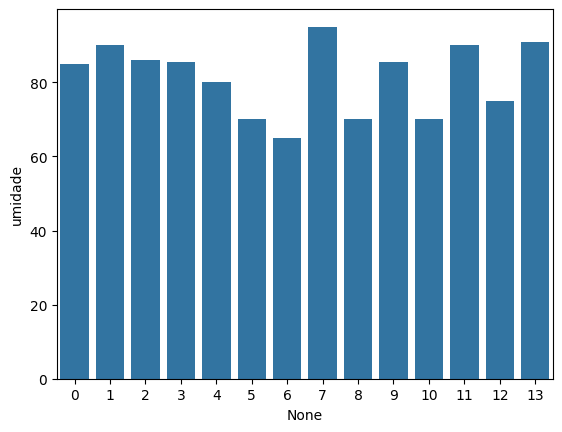

In [45]:
sns.barplot(data=df, x=df.index, y='umidade')
plt.show()

In [33]:
agrupado = df.groupby('jogar').size()
agrupado

jogar
nao    5
sim    9
dtype: int64

In [46]:
df.isnull().sum()

aparencia      0
temperatura    0
umidade        0
vento          1
jogar          0
dtype: int64

In [47]:
agrupado = df.groupby('vento').size()
agrupado

vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
# Subistituir vento nulo pela moda
df['vento'].fillna('FALSO', inplace=True) # Vai deixar de ser válido no Pandas 3.0
# df['vento'] = df['vento'].fillna('FALSO') # Forma atualizada

In [56]:
df.head()

,aparencia,temperatura,umidade,vento,jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [57]:
agrupado = df.groupby('vento').size()
agrupado

vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [61]:
df.head()

,aparencia,temperatura,umidade,vento,jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [62]:
df.describe()   

,temperatura,umidade
count,14.000000,14.000000
mean,73.678571,81.285714
std,6.556286,9.585073
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.750000,85.250000
75%,78.750000,89.000000
max,85.000000,95.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aparencia    14 non-null     object 
 1   temperatura  14 non-null     float64
 2   umidade      14 non-null     float64
 3   vento        14 non-null     object 
 4   jogar        14 non-null     object 
dtypes: float64(2), object(3)
memory usage: 692.0+ bytes
